# INTRODUCTION TO TENSORFLOW 
* Tensorflow is a machine learning package developed by Google. Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework that creates a simple, layer-centric interface to Tensorflow. We will be dealing with the Keras interface.
* Loading the related packages.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* In this example, the coffee roasting time duration with the roasting temperature will be studied.
* Loading and visualizing the coffee data.

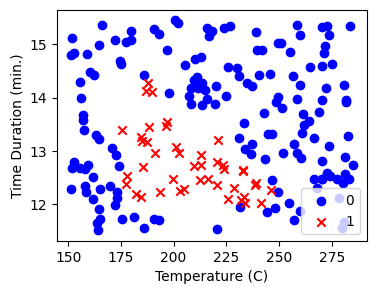

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data=np.loadtxt('assets/data/coffe_data.txt')
X=data[:,[0,1]]
y=data[:,2]

fig=plt.figure(figsize=(4,3))
plt.scatter(X[y==0,0],X[y==0,1],marker='o',c='b')
plt.scatter(X[y==1,0],X[y==1,1],marker='x',c='r')
plt.xlabel('Temperature (C)')
plt.ylabel('Time Duration (min.)')
plt.legend(['0','1'])

* Fitting the weights to the data will proceed more quickly if the data is **normalized** where features in the data are each normalized to have a similar range. 
* The procedure below uses a Keras normalization layer. It has the following steps:
    * create an instance  of a **Normalization Layer** class with suitable constructor. Note that this is not an actual sequential layer in the model.
    * Utilize the **adapt** method of the class, which will calculta the mean and variance of the data set and saves the values internally.
    * normalize the data.
* Remember that any new data should be normalized before applying any inference. 

In [ ]:
print(f"Raw Temperature (max,min): ({np.max(X[:,0]):0.2f},{np.min(X[:,0]):0.2f})")
print(f"Raw Time Duration (max,min): ({np.max(X[:,1]):0.1f},{np.min(X[:,1]):0.1f})")
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(X)  # learns mean, variance
X_norm = norm_layer(X)
print(f"Normalized Temperature (max,min): ({np.max(X_norm[:,0]):0.2f},{np.min(X_norm[:,0]):0.2f})")
print(f"Normalized Time Duration (max,min): ({np.max(X_norm[:,1]):0.1f},{np.min(X_norm[:,1]):0.1f})")

* Expand(tile) the original data by repeating it, which will increase the size of the training set artificially and help reducing the number of training epochs.

In [ ]:
X_exp = np.tile(X_norm,(1000,1))
Y_exp= np.tile(y,(1000,1))   
print(X_exp.shape, Y_exp.shape)  

* Tensor flow model for coffee roasting consists of two layers with sigmoid activations.
* You may either  tell the model the expected shape of the input with the tf.keras.Input(shape=(2,)), or it can be omitted during the model-creation and the Tensorflow will figure it out itself when the input data is fed into the model-fitting.
* The model.summary() provides a description of the network.

In [ ]:
# The randomness seeding helps you get consistent result with each run of the model
tf.random.set_seed(1234) 
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)
model.summary()

* The model.compile statement defines a loss function and specifies a compile optimization.
* The model.fit statement runs gradient descent and fits the weights to the data.
* Some important  terms:
    * **Batch** refers to a set of samples used during the training of a model. 
    * **Epoch** refers to the number of times the machine learning will go through the entire dataset. 
    * **Iteration** refers to the number of batches needed to complete 1 epoch.
* For efficiency, the training data set is broken into 'batches' which underlines the stochastic nature of the gradient descent algorithm employed. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded (tiled) data set thus there are 6250 batches to be completed for each epoch.

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    X_exp,Y_exp,
    epochs=10,
)

* After the model fitting the weights will be updated.
* A new input data should be normalized before it is fed into the model.

In [ ]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1,"\nW2:", W2, "\nb2:", b2)

X_test = np.array([
    [200,13.9],  
    [200,17]])  
X_test_norm = norm_layer(X_test)
predictions = model.predict(X_test_norm)
print("predictions: \n", predictions)
yhat = (predictions >= 0.5).astype(int)
print(f"y_hat = \n{yhat}")